In [1]:
import matplotlib.pyplot as plt  # fine tune control over visualizations
import numpy as np  # to manipulate data/generate random numbers
import pandas as pd  # to read/manipulate/write data from files
import seaborn as sns  # static visualizations

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram  # to perform cluster analysis
from scipy.spatial.distance import pdist, squareform  # to calculate distances and convert between condensed and square forms of a distance matrix
from sklearn.preprocessing import MinMaxScaler  # To standardize our data before clustering

In [10]:
subset_df = pd.read_csv("my_dataset.tsv", sep='\t')
subset_df.head()
subset_df.set_index("subjectkey", inplace=True)
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVG19M2F39 to NDAR_INVFNERG0W1
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   interview_date                1000 non-null   object 
 1   interview_age                 1000 non-null   int64  
 2   sex                           1000 non-null   object 
 3   site_id_l                     1000 non-null   object 
 4   anthroheightcalc              1000 non-null   float64
 5   anthroweightcalc              1000 non-null   float64
 6   ehi_y_ss_scoreb               1000 non-null   int64  
 7   neighborhood_crime_y          1000 non-null   float64
 8   snellen_aid_y                 1000 non-null   float64
 9   ksads_1_5_p                   1000 non-null   int64  
 10  ksads_1_840_p                 1000 non-null   int64  
 11  cbcl_scr_syn_internal_r       1000 non-null   float64
 12  prosocial_q2_y                1000 non-n

In [11]:
subset_df["interview_date"] = pd.to_datetime(subset_df["interview_date"])
subset_df.head()
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVG19M2F39 to NDAR_INVFNERG0W1
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   interview_date                1000 non-null   datetime64[ns]
 1   interview_age                 1000 non-null   int64         
 2   sex                           1000 non-null   object        
 3   site_id_l                     1000 non-null   object        
 4   anthroheightcalc              1000 non-null   float64       
 5   anthroweightcalc              1000 non-null   float64       
 6   ehi_y_ss_scoreb               1000 non-null   int64         
 7   neighborhood_crime_y          1000 non-null   float64       
 8   snellen_aid_y                 1000 non-null   float64       
 9   ksads_1_5_p                   1000 non-null   int64         
 10  ksads_1_840_p                 1000 non-null   int64         
 11  cbcl_scr

In [12]:
cat_df = subset_df.select_dtypes(include=["object"])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVG19M2F39 to NDAR_INVFNERG0W1
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    1000 non-null   object
 1   site_id_l              1000 non-null   object
 2   mri_info_manufacturer  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [13]:
cat_df.head()

,sex,site_id_l,mri_info_manufacturer
subjectkey,,,
NDAR_INVG19M2F39,F,site08,SIEMENS
NDAR_INVM41A58WT,F,site19,Philips Medical Systems
NDAR_INV9D98AYBL,F,site16,SIEMENS
NDAR_INVHY5L5CMP,F,site07,SIEMENS
NDAR_INVV36RW8GC,M,site20,SIEMENS


In [15]:
cat_features = pd.get_dummies(cat_df, drop_first=True)
cat_features

,sex_M,site_id_l_site02,site_id_l_site03,site_id_l_site04,site_id_l_site05,site_id_l_site06,site_id_l_site07,site_id_l_site08,site_id_l_site09,site_id_l_site10,...,site_id_l_site15,site_id_l_site16,site_id_l_site17,site_id_l_site18,site_id_l_site19,site_id_l_site20,site_id_l_site21,site_id_l_site22,mri_info_manufacturer_Philips Medical Systems,mri_info_manufacturer_SIEMENS
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INVG19M2F39,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
NDAR_INVM41A58WT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
NDAR_INV9D98AYBL,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
NDAR_INVHY5L5CMP,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NDAR_INVV36RW8GC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INV628TL13A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
NDAR_INVJNGRXG20,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NDAR_INVVA82JDEJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
num_df = subset_df.select_dtypes(include=["int64", "float64"])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVG19M2F39 to NDAR_INVFNERG0W1
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   interview_age                 1000 non-null   int64  
 1   anthroheightcalc              1000 non-null   float64
 2   anthroweightcalc              1000 non-null   float64
 3   ehi_y_ss_scoreb               1000 non-null   int64  
 4   neighborhood_crime_y          1000 non-null   float64
 5   snellen_aid_y                 1000 non-null   float64
 6   ksads_1_5_p                   1000 non-null   int64  
 7   ksads_1_840_p                 1000 non-null   int64  
 8   cbcl_scr_syn_internal_r       1000 non-null   float64
 9   prosocial_q2_y                1000 non-null   float64
 10  prosocial_q3_y                1000 non-null   float64
 11  cash_choice_task              1000 non-null   float64
 12  nihtbx_flanker_agecorrected   1000 non-n

In [19]:
# Scale standardisation of numerical values
minmax = MinMaxScaler(feature_range=(0, 1))

num_features = pd.DataFrame(
    minmax.fit_transform(num_df),
    index=num_df.index,
    columns=num_df.columns
)

In [20]:
df_scaled = pd.concat([num_features, cat_features], axis="columns")

# Confirm that all data lies between zero and one.
print(f"Data min, max: {df_scaled.min().min(), df_scaled.max().max()}")

Data min, max: (0.0, 1.0)


In [21]:
!pip install gower
import gower

In [22]:
# Get the Gower's distance matrix
Y = gower.gower_matrix(df_scaled.T).astype(np.float64)

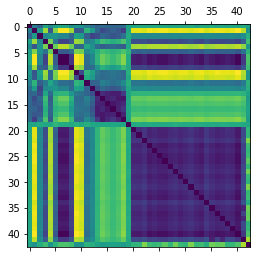

In [23]:
plt.matshow(Y)

In [24]:
# That result was in "uncondensed form". Let's use a scipy convenience
# function to convert it into a condensed array form. This stores only
# the upper triangular part since `Y` is a symmetric matrix.
Y = squareform(Y)

In [25]:
Z = linkage(Y, method="complete", optimal_ordering=True)

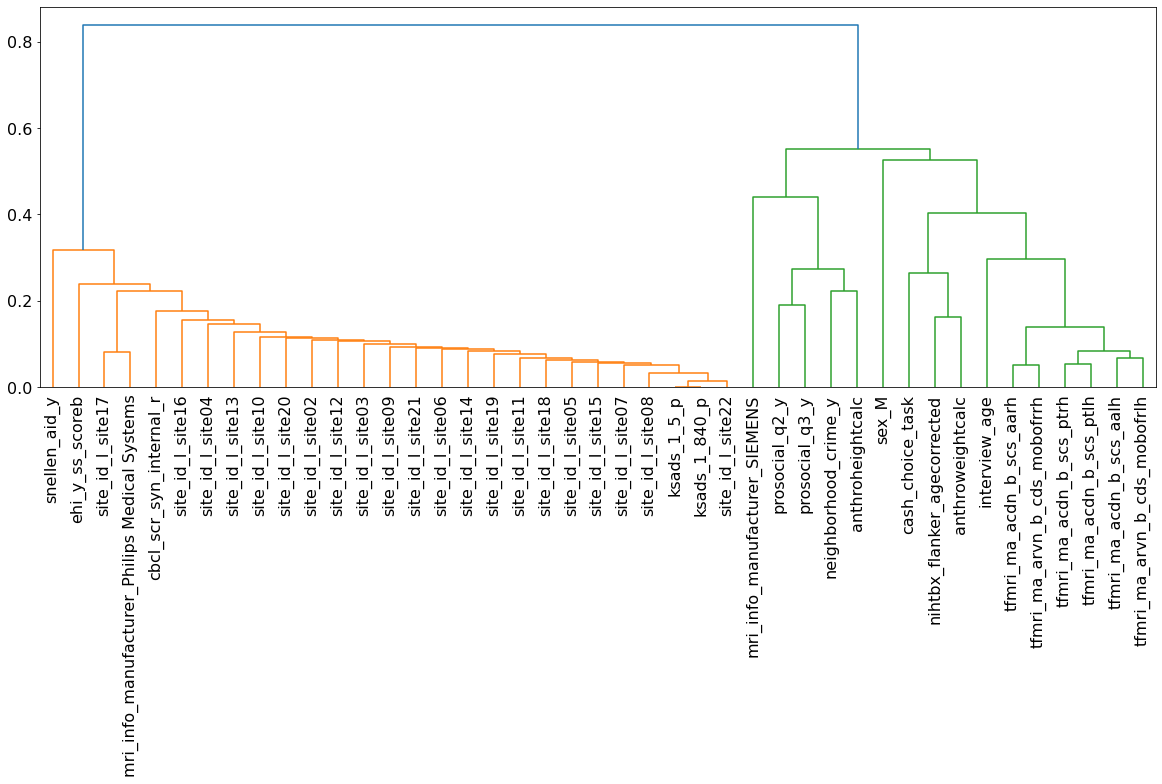

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
dn = dendrogram(
    Z,
    ax=ax,
    orientation="top",
    distance_sort='descending',
    show_leaf_counts=True,
)

# `dn["ivl"] stores a list of the feature indices in the order they appear on the x axis.
# Let's label the x-axis using the actual feature names rather than the indices
_ = ax.set_xticklabels(
    [list(df_scaled.columns)[int(i)] for i in dn["ivl"]],
    rotation=90,
    fontsize=16,
)

yticks = np.linspace(0.0, 0.8, 5)
_ = ax.set_yticks(yticks)
_ = ax.set_yticklabels([round(y, 1) for y in yticks], fontsize=16)

In [28]:
c, coph_dists = cophenet(Z, pdist(df_scaled.T.values, "cityblock"))
print(f"Cophenetic correlation coefficient: {c}")

Cophenetic correlation coefficient: 0.9056070370061775
